# Efficient-CapsNet Model Test

In this notebook we provide a simple interface to test the different trained Efficient-CapsNet models on the three datasets:

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages
from models import EfficientCapsNet

In [34]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [56]:
# some parameters
model_name = 'MNIST' 
custom_path = '/home/abar/Documents/Efficient-CapsNet/bin/efficient_capsnetMNIST_new_train.h5' # if you've trained a new model, insert here the full graph weights path

# 1.0 Import the Dataset

In [57]:
dataset = Dataset(model_name, config_path='config.json')

[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

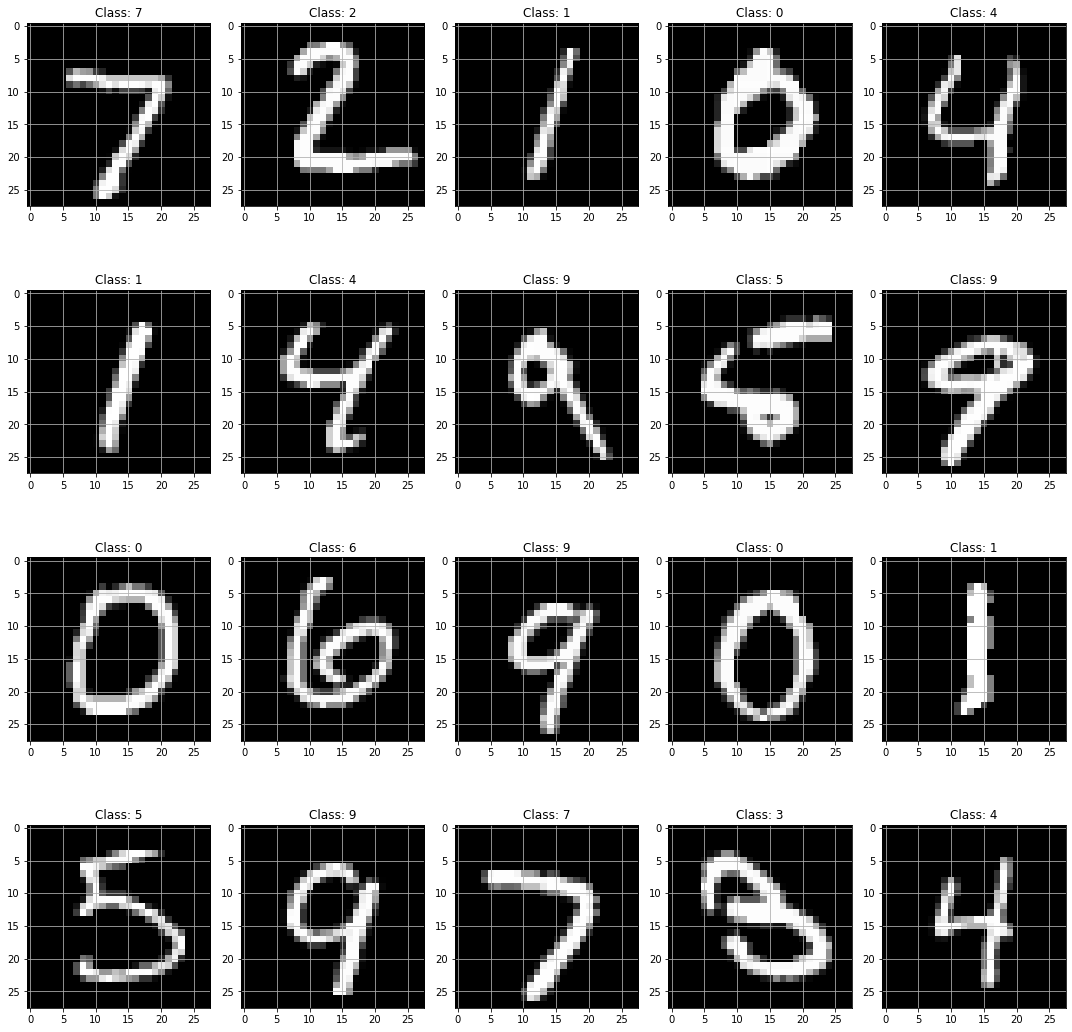

In [58]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [59]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path=custom_path)

model_test.load_graph_weights() # load graph weights (bin folder)

Model: "Efficient_CapsNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_36 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_37 (Batc (None, 22, 22, 64)        256       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
batch_normalization_38 (Batc (None, 20, 20, 64)  

# 3.0 Test the Model

In [60]:
model_test.evaluate(dataset.X_test, dataset.y_test) # if "smallnorb" use X_test_patch

------------------------------MNIST Evaluation------------------------------
Test acc: 0.9964
Test error [%]: 0.3600%
N° misclassified images: 36 out of 10000


## 3.1 Plot misclassified images

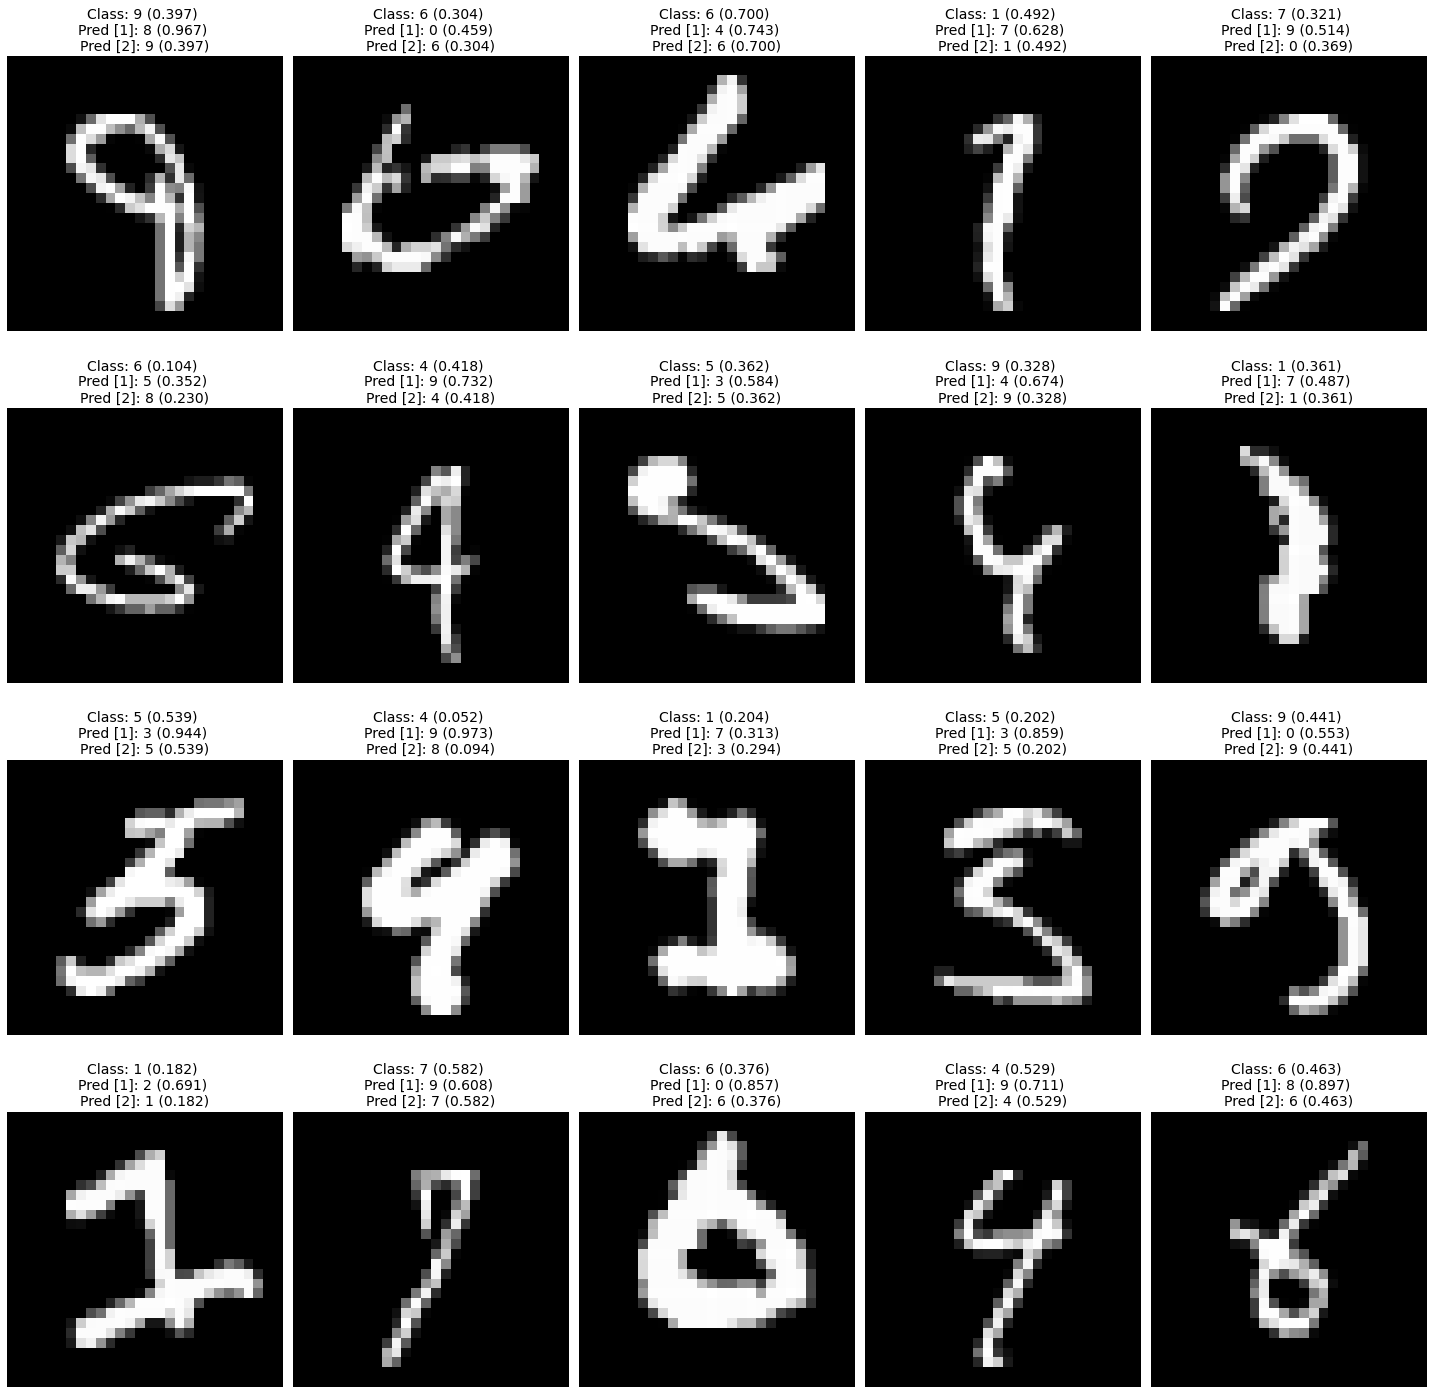

In [61]:
#not working with MultiMNIST
y_pred = model_test.predict(dataset.X_test)[0] # if "smallnorb" use X_test_patch

n_images = 20
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, # if "smallnorb" use X_test_patch
                n_images, dataset.class_names)